## Acceso a Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 6.0 MB/s eta 0:00:00


In [4]:
from unidecode import unidecode

## Funciones

In [5]:
def clean_text(text):
    # Expresión regular para encontrar todas las cadenas que empiezan con "https://t.co/" y tienen uno o más caracteres que no son espacios en blanco.
    pattern = r'https://t.co/[^\s]+|@[a-zA-Z0-9_]{1,15}|[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]+|[^\w\s]'
    
    # Reemplaza todas las cadenas que coinciden con la expresión regular por una cadena vacía.
    clean_text = re.sub(pattern, '', text)
    
    # Convertir todas las letras a minúsculas
    clean_text = clean_text.lower()

    return clean_text

## Leyendo datos

In [6]:
text_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/sources/csvs/train_data.csv", names=['image', 'text'],header=None) 
labels_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/sources/csvs/train_labels_subtask_2.csv", names=['accidente', 'asesinato', 'robo', 'otro'],header=None)

d = {'image':text_df['image'].values, 'text':text_df['text'].values, 'accidente':labels_df['accidente'].values, 'asesinato':labels_df['asesinato'].values, 'robo':labels_df['robo'].values, 'otro':labels_df['otro'].values}
df = pd.DataFrame(data = d)

pd.set_option('display.max_colwidth',None)
df.head(5)

,image,text,accidente,asesinato,robo,otro
0,['E_f1Fl-XMAMPFkT.jpg'],Morales: #EEUU “sufrió una derrota vergonzosa” ante el terrorismo y el narcotráfico #NarcoterrorismoDoméstico https://t.co/GCenoztH3H https://t.co/WMF36c68i3,0,0,0,1
1,['E8NYFP5WYAEpNRb.jpg'],"Tus acciones te hacen ser una bella persona, no tu color de piel o tu dinero, esa joven con su hermoso gesto me robo el corazon. https://t.co/wXfw2Hrqv7",0,0,0,1
2,['E_BP33UXoAYQcTI.png'],"#Seguridad 🚨🛑 Detuvo policía municipal a dos hombres por robo a casa habitación, en #Puebla. En la acción se recuperaron computadoras portátiles, un equipo de audio, un dispositivo de comunicación móvil, entre otros artículos. Urbano| Noticias https://t.co/xXKSnVjz8k... https://t.co/HcoPbEpPLk",0,0,1,0
3,['E_XFlhCXIAAl-GR.jpg'],20 años del accidente que convirtió a Alex Zanardi en leyenda. https://t.co/TALvr20hB5,0,0,0,1
4,"['E_Gc6blX0AEnhW5.jpg', 'E_Gc3IzWQA046Zf.jpg']","¡Llega el castigo para Max Verstappen! El neerlandés tendrá tres posiciones de sanción en la parrilla de salida del #RussianGP, tras el accidente que protagonizó con Lewis Hamilton en el #ItalianGP ¿Qué opinan de la decisión de la FIA? | #F1 https://t.co/yfUlLPzcGL",0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      2996 non-null   object
 1   text       2996 non-null   object
 2   accidente  2996 non-null   int64 
 3   asesinato  2996 non-null   int64 
 4   robo       2996 non-null   int64 
 5   otro       2996 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 140.6+ KB


In [8]:
df.isnull().sum()

image        0
text         0
accidente    0
asesinato    0
robo         0
otro         0
dtype: int64

## Limpieza de datos

In [9]:
df_Preprocessing = df.copy()

In [10]:
df_Preprocessing.drop('image', axis=1, inplace=True)

In [11]:
# Aplica la función a la columna "text" del DataFrame "df".
df_Preprocessing['text'] = df_Preprocessing['text'].apply(clean_text)

In [12]:
df_Preprocessing['accidente'] = df_Preprocessing['accidente'].astype(float)
df_Preprocessing['asesinato'] = df_Preprocessing['asesinato'].astype(float)
df_Preprocessing['robo'] = df_Preprocessing['robo'].astype(float)
df_Preprocessing['otro'] = df_Preprocessing['otro'].astype(float)

In [13]:
df_Preprocessing

,text,accidente,asesinato,robo,otro
0,morales eeuu sufrió una derrota vergonzosa ante el terrorismo y el narcotráfico narcoterrorismodoméstico,0.0,0.0,0.0,1.0
1,tus acciones te hacen ser una bella persona no tu color de piel o tu dinero esa joven con su hermoso gesto me robo el corazon,0.0,0.0,0.0,1.0
2,seguridad detuvo policía municipal a dos hombres por robo a casa habitación en puebla en la acción se recuperaron computadoras portátiles un equipo de audio un dispositivo de comunicación móvil entre otros artículos urbano noticias,0.0,0.0,1.0,0.0
3,20 años del accidente que convirtió a alex zanardi en leyenda,0.0,0.0,0.0,1.0
4,llega el castigo para max verstappen el neerlandés tendrá tres posiciones de sanción en la parrilla de salida del russiangp tras el accidente que protagonizó con lewis hamilton en el italiangp qué opinan de la decisión de la fia f1,0.0,0.0,0.0,1.0
...,...,...,...,...,...
2991,estan en su derecho de ser escuchados y conciliar por el accidente pero desde el momento que estan en carreras ilegales a mi parecer saben que estan expuestos a todo accidentes de todo tipo para eso existen lugares para ese tipo de competicion,0.0,0.0,0.0,1.0
2992,15 av y 5a calle zona 1 se produjo accidente de tres vehículos bomberos voluntarios 4a cía evaluaron a las personas resultaron ilesas,1.0,0.0,0.0,0.0
2993,detienen a 2 policías sudafricanos por asesinato de un joven con síndrome de down nathaniel julius adolescente de 16 años con síndrome de down fue asesinado el miércoles en eldorado park el joven había salido a comprar galletas a un vía eluniversal,0.0,1.0,0.0,0.0
2994,camionetaenllamas una camioneta se incendió en la colonia tabachines en el municipio de zapopan después de un accidente 𝙍𝙚𝙥𝙤𝙧𝙩𝙚𝘾𝙞𝙪𝙙𝙖𝙙𝙖𝙣𝙤𝙉𝙤𝙩𝙞𝙘𝙞𝙖𝙨,1.0,0.0,0.0,0.0


## Análisis exploratorio de datos

### Distribución de etiquetas

#### Conteo de tuits por categoria

accidente

In [14]:
# Filtrar los tuits que pertenecen a la categoría "accidente"
accidente_tweets = df_Preprocessing[df['accidente'] == 1]['text']

# Contar los tuits que pertenecen a la categoría "accidente"
count_accidentes = df_Preprocessing['accidente'].sum()
count_ones = df_Preprocessing['accidente'].value_counts()[1]
count_accidente_tweets = sum(df['accidente'] == 1)

# Imprimir los tuits que pertenecen a la categoría "accidente"
print(accidente_tweets)

# Imprimir el numero de tuits que pertenecen a la categoría "accidente" respectivamente
print()
print(count_accidentes)
print(count_ones)
print(count_accidente_tweets)

5                                                                                                              accidente  se  en el paso a desnivel al final de la 20 calle de la zona 10 ingreso a santa catarina pinula persona fallecida  
6                  endesarrollo  un camión que transportaba jugadores se precipitó a un barranco de 7 metros de profundidad el accidente ocurrió en la carretera litoral a la altura del cantón cipres en conchagua la unión según reporta   
10                                                                                 precauciónvial en zacatecas se registra accidente vial cerca del km 027500 carretera 2870 libramiento víctor rosales mismo tramo atienda indicación vial  
11                                                                                                                           accidente en bogotámosquera  rn5008a gtoriente traficobogota tráfico avanzando1h 7m más lento de lo habitual    
15                                              

asesinato

In [15]:
accidente_tweets = df_Preprocessing[df['asesinato'] == 1]['text']

count_accidentes = df_Preprocessing['asesinato'].sum()
count_ones = df_Preprocessing['asesinato'].value_counts()[1]
count_accidente_tweets = sum(df['asesinato'] == 1)

print(accidente_tweets)

print()
print(count_accidentes)
print(count_ones)
print(count_accidente_tweets)

17                                                                                                                                                                                             videos  ola de violencia en oaxaca asesinan a magistrado a una familia y a tres mujeres    
22                                                        últimahora autoridades reportan asesinato en la colonia médica de un joven identificado como edgar alvarenga de 19 años según la primeras declaraciones fue asaltado en un autobús r22 al encarar al asaltante éste le disparó  
33                                                                                                                                                                                                                          noche de violencia en ixmiquilpan  ejecutan a dos hombres     
52              comunicadodeprensa este comando rechaza categóricamente el vil asesinato del subteniete carlos arturo becerra castellanos por integrant

robo

In [16]:
accidente_tweets = df_Preprocessing[df['robo'] == 1]['text']

count_accidentes = df_Preprocessing['robo'].sum()
count_ones = df_Preprocessing['robo'].value_counts()[1]
count_accidente_tweets = sum(df['robo'] == 1)

print(accidente_tweets)

print()
print(count_accidentes)
print(count_ones)
print(count_accidente_tweets)

2       seguridad  detuvo policía municipal a dos hombres por robo a casa habitación en puebla en la acción se recuperaron computadoras portátiles un equipo de audio un dispositivo de comunicación móvil entre otros artículos urbano noticias    
7                                                                             sujeto de la izq aprehendido hace 2 semanas por robo a cable de   y ayer nuevamente robando que pasa con el mp    no hay alumbrado público en 3era secc tlatelolco    
22                  últimahora autoridades reportan asesinato en la colonia médica de un joven identificado como edgar alvarenga de 19 años según la primeras declaraciones fue asaltado en un autobús r22 al encarar al asaltante éste le disparó  
26                                                     tres vendedores de abarrotes fueron lesionados con armas de fuego tras un intento de asalto sobre la calle luis long norte esquina con ejercito nacional de la colonia san martin de porres  
50                  

otro

In [17]:
accidente_tweets = df_Preprocessing[df['otro'] == 1]['text']

count_accidentes = df_Preprocessing['otro'].sum()
count_ones = df_Preprocessing['otro'].value_counts()[1]
count_accidente_tweets = sum(df['otro'] == 1)

print(accidente_tweets)

print()
print(count_accidentes)
print(count_ones)
print(count_accidente_tweets)

0                                                                                                                                                                morales eeuu sufrió una derrota vergonzosa ante el terrorismo y el narcotráfico narcoterrorismodoméstico     
1                                                                                                                                              tus acciones te hacen ser una bella persona no tu color de piel o tu dinero esa joven con su hermoso gesto me robo el corazon  
3                                                                                                                                                                                                              20 años del accidente que convirtió a alex zanardi en leyenda  
4                                llega el castigo para max verstappen  el neerlandés tendrá tres posiciones de sanción en la parrilla de salida del russiangp tras el accidente que protago

#### Graficando distribución de las etiquetas

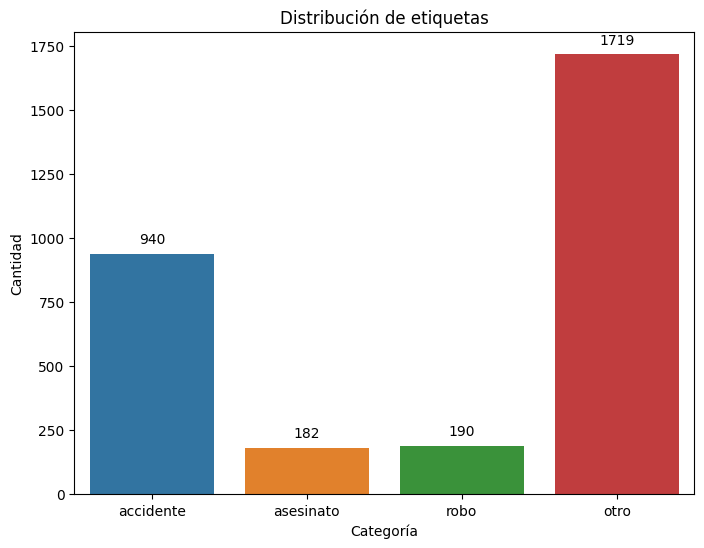

In [18]:
# Suponiendo que tu DataFrame se llama df

# Obtener la suma de las etiquetas para cada categoría
labels_sum = df_Preprocessing[['accidente', 'asesinato', 'robo', 'otro']].sum()

# Crear una figura de matplotlib
plt.figure(figsize=(8, 6))

# Graficar la distribución de etiquetas
ax = sns.barplot(x=labels_sum.index, y=labels_sum.values)

# Agregar etiquetas en la parte superior de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Establecer el título y etiquetas de los ejes
plt.title('Distribución de etiquetas')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

#### Over_sampling

In [19]:
df_Balanced = df_Preprocessing.copy()

## Divide el dataset

In [20]:
from sklearn.model_selection import train_test_split

xFeatures = df_Balanced['text']
yLabels = df_Balanced[['accidente', 'asesinato', 'robo', 'otro']]

x_train, x_test, y_train, y_test = train_test_split(xFeatures, yLabels, test_size=0.1, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df_Balanced["text"], df_Balanced[["accidente", "asesinato", "robo", "otro"]], test_size=0.1, random_state=42)
#train, test = train_test_split(df_Balanced, test_size=0.1, stratify=df_Balanced["labels"], random_state=42)
# train, test = train_test_split(df_Balanced, test_size=0.0004, stratify=df_Balanced["labels"], random_state=42)
len(x_train), len(x_test)

(2696, 300)

In [21]:
df_Balanced_train = x_train.copy()
target_train = y_train.copy()

df_Balanced_test = x_test.copy()
target_test = y_test.copy()

## Feature engineering

In [22]:
example_sentence = df_Balanced.iloc[431]["text"]
print(example_sentence)

  no murió  ya vez que algunos compañeros inventan o exagerados  tuvo un accidente solamente y pero esta vivita y dando lata   


In [23]:
from nltk.tokenize.toktok import ToktokTokenizer
tk_tokenizer = ToktokTokenizer()

tokens = tk_tokenizer.tokenize(example_sentence)
print(" # ".join(tokens))

no # murió # ya # vez # que # algunos # compañeros # inventan # o # exagerados # tuvo # un # accidente # solamente # y # pero # esta # vivita # y # dando # lata


In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
sp_stopwords = stopwords.words("spanish")
sp_punctuation = string.punctuation + '¿¡'

not_wanted = set((unidecode(word) for word in sp_stopwords)) | set(sp_punctuation)
  
tk_tokenizer = ToktokTokenizer()


def tokenize(sentence):
    clean = []
    clean_sentence = unidecode(sentence)
    for token_ in tk_tokenizer.tokenize(clean_sentence):
        token = token_.lower()
        if token in not_wanted:
            continue
        clean.append(token)
    return clean

In [26]:
tokens = tokenize(example_sentence)
print(example_sentence)
print()
tokens = tokenize(example_sentence)
print(" # ".join(tokens))

  no murió  ya vez que algunos compañeros inventan o exagerados  tuvo un accidente solamente y pero esta vivita y dando lata   

murio # vez # companeros # inventan # exagerados # accidente # solamente # vivita # dando # lata


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizador_real = CountVectorizer(binary=True, analyzer=tokenize)
# vectorizador_real = CountVectorizer(binary=True, analyzer=tokenize, max_features=1000)
# vectorizador_real = CountVectorizer(binary=True, analyzer=tokenize, min_df=0.01 )

In [28]:
vectorizador_real.fit(df_Balanced_train)

train_x = vectorizador_real.transform(df_Balanced_train)
test_x = vectorizador_real.transform(df_Balanced_test)

## Implementación de modelo

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier

In [30]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 2.6 MB/s eta 0:00:00


In [31]:
from skmultilearn.problem_transform import BinaryRelevance
#from sklearn.multioutput import MultiOutputClassifier

In [32]:
train_x

<2696x12435 sparse matrix of type '<class 'numpy.int64'>'
	with 44763 stored elements in Compressed Sparse Row format>

In [33]:
target_train

,accidente,asesinato,robo,otro
979,1.0,0.0,0.0,0.0
1229,0.0,0.0,0.0,1.0
324,0.0,0.0,0.0,1.0
2538,0.0,0.0,1.0,0.0
1655,0.0,0.0,0.0,1.0
...,...,...,...,...
1638,0.0,0.0,0.0,1.0
1095,1.0,0.0,0.0,0.0
1130,0.0,0.0,0.0,1.0
1294,0.0,0.0,0.0,1.0


### Regresion logistica multinomial

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(class_weight="balanced", random_state=42, solver= "saga", multi_class= "multinomial", n_jobs=-1, C=1)

binary_rel_clf = BinaryRelevance(lr)

binary_rel_clf.fit(train_x,target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


BinaryRelevance(classifier=LogisticRegression(C=1, class_weight='balanced',
                                              multi_class='multinomial',
                                              n_jobs=-1, random_state=42,
                                              solver='saga'),
                require_dense=[True, True])

In [ ]:
train_pred = binary_rel_clf.predict(train_x)
test_pred = binary_rel_clf.predict(test_x)

training_accuracy = accuracy_score(target_train, train_pred)

test_accuracy = accuracy_score(target_test, test_pred)
test_precision_macro = precision_score(target_test, test_pred, average='macro')
test_recall_macro = recall_score(target_test, test_pred, average='macro')
test_f1_macro = f1_score(target_test, test_pred, average='macro')
#test_matrix = confusion_matrix(target_test, test_pred)

print(f"Training accuracy:   {training_accuracy:0.2%}")

print(f"Test accuracy: {test_accuracy:0.2%}")
print(f"Test precision: {test_precision_macro}")
print(f"Test recall: {test_recall_macro}")
print(f"Test f1-score: {test_f1_macro}")
#print(f"Test Matrix: {test_matrix}")

Training accuracy:   99.89%
Test accuracy: 84.33%
Test precision: 0.7802910637939386
Test recall: 0.8367631520256807
Test f1-score: 0.8074328878105536


In [ ]:
train_pred

<2696x4 sparse matrix of type '<class 'numpy.float64'>'
	with 2731 stored elements in Compressed Sparse Column format>

In [ ]:
train_pred_dense = train_pred.toarray()
train_pred_int = train_pred_dense.astype(np.int64)
print(train_pred_int)

[[1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [ ]:
train_pred_int_df = pd.DataFrame(train_pred_int)
print(train_pred_int_df)

      0  1  2  3
0     1  0  0  0
1     0  0  0  1
2     0  0  0  1
3     0  0  1  0
4     0  0  0  1
...  .. .. .. ..
2691  0  0  0  1
2692  1  0  0  0
2693  0  0  0  1
2694  0  0  0  1
2695  0  0  0  1

[2696 rows x 4 columns]


## Datos de validación

In [ ]:
validation_data_df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/sources/csvs_secondData/subtask_2/test_data.csv', names=['image', 'text'],header=None)

pd.set_option('display.max_colwidth',None)
validation_data_df.head(5)

,image,text
0,"['E_hBbp6XMAknEbw.jpg', 'E_hBbNiXMAITzrB.jpg', 'E_hBaxeXMAM58cB.jpg']",En el sector Los Hongos de Tunja se presentó un accidente de tránsito. @bomberostunja atendió la emergencia. https://t.co/617qGVw8BP
1,['E_KhOU6XIAc0mQ0.jpg'],"#TráficoSv | Reportan un accidente de tránsito en los alrededores de la zona industrial en la carretera Panamericana, en el sentido que de Santa Ana conduce hacia San Salvador. https://t.co/RDBA4L4poe"
2,['E_QPcM4XIAAaxM6.jpg'],"#13Sep #Lara Vehículo impacta contra una tubería de agua Pasadas las horas del medio día de este lunes, se registró un accidente en la carretera Centroccidental a la altura del sector Santana, del municipio Torres en Lara. Según la información aportada… https://t.co/bwZ86hCMXJ https://t.co/MvJgoKOwP3"
3,['E_LLYrEXEAUqner.jpg'],"@PNCSV confirma Accidente de tránsito en carretera Troncal del Norte a la altura del kilómetro 5 1/2, provocado por una rastra, que al parecer perdió el control, impactando contra una gasolinera. El hecho dejó dos fallecidos, un hombre y una mujer que p"
4,"['E_SRMtcXoAA_CPz.jpg', 'E_SRMXDXIAE0ZZJ.jpg']","Unidades del BCBVP atendieron emergencia por accidente de tránsito en la Avenida Pastrana, en donde una persona del sexo masculino que se movilizaba como conductor de una motocicleta, colisionó con otro velomotor lo que le ocasionó trauma en la extremidad superior derecha. https://t.co/tvYo3yAEqZ"


In [ ]:
validation_data_df.drop('image', axis=1, inplace=True)
validation_data_df

,text
0,En el sector Los Hongos de Tunja se presentó un accidente de tránsito. @bomberostunja atendió la emergencia. https://t.co/617qGVw8BP
1,"#TráficoSv | Reportan un accidente de tránsito en los alrededores de la zona industrial en la carretera Panamericana, en el sentido que de Santa Ana conduce hacia San Salvador. https://t.co/RDBA4L4poe"
2,"#13Sep #Lara Vehículo impacta contra una tubería de agua Pasadas las horas del medio día de este lunes, se registró un accidente en la carretera Centroccidental a la altura del sector Santana, del municipio Torres en Lara. Según la información aportada… https://t.co/bwZ86hCMXJ https://t.co/MvJgoKOwP3"
3,"@PNCSV confirma Accidente de tránsito en carretera Troncal del Norte a la altura del kilómetro 5 1/2, provocado por una rastra, que al parecer perdió el control, impactando contra una gasolinera. El hecho dejó dos fallecidos, un hombre y una mujer que p"
4,"Unidades del BCBVP atendieron emergencia por accidente de tránsito en la Avenida Pastrana, en donde una persona del sexo masculino que se movilizaba como conductor de una motocicleta, colisionó con otro velomotor lo que le ocasionó trauma en la extremidad superior derecha. https://t.co/tvYo3yAEqZ"
...,...
1148,#LoÚltimo | Socorristas de Cruz Roja Salvadoreña atendieron a motociclista que sufrió un accidente de tránsito y resultó con una fractura en su miembro superior izquierdo. Foto: cortesía. https://t.co/LDQt3hwVzx
1149,"Por dárselas de 'Superman' agrediendo a su pareja, fue puesto a disposición por el delito de violencia intrafamiliar, procedimiento realizado en Villahermosa #Medellín. Denuncie Línea 155 para atención a mujeres víctimas de maltrato. #PatrullaEnCasa #SomosUnoSomosTodos https://t.co/1KFpHzIEQh"
1150,"Cae sujeto vinculado al robo de medicinas contra el cáncer en Iztapalapa: Portaba dinero en efectivo del que no pudo comprobar su procedencia; el sospechoso fue trasladado a la Fiscalía capitalina, donde será interrogado https://t.co/a9yXT4Yfun (vía ElUniversal) https://t.co/r41nhHeGzC"
1151,"Nuestras unidades R-1 y H-3 trabajan en accidente de tránsito en Calle el Canelo con Casanova, se trata de colisión de dos vehículos menores 5 personas involucradas. https://t.co/cPoRDZskXL"


In [ ]:
validation_data_df['text'] = validation_data_df['text'].apply(clean_text)
validation_data_df

,text
0,en el sector los hongos de tunja se presentó un accidente de tránsito atendió la emergencia
1,tráficosv reportan un accidente de tránsito en los alrededores de la zona industrial en la carretera panamericana en el sentido que de santa ana conduce hacia san salvador
2,13sep lara vehículo impacta contra una tubería de agua pasadas las horas del medio día de este lunes se registró un accidente en la carretera centroccidental a la altura del sector santana del municipio torres en lara según la información aportada
3,confirma accidente de tránsito en carretera troncal del norte a la altura del kilómetro 5 12 provocado por una rastra que al parecer perdió el control impactando contra una gasolinera el hecho dejó dos fallecidos un hombre y una mujer que p
4,unidades del bcbvp atendieron emergencia por accidente de tránsito en la avenida pastrana en donde una persona del sexo masculino que se movilizaba como conductor de una motocicleta colisionó con otro velomotor lo que le ocasionó trauma en la extremidad superior derecha
...,...
1148,loúltimo socorristas de cruz roja salvadoreña atendieron a motociclista que sufrió un accidente de tránsito y resultó con una fractura en su miembro superior izquierdo foto cortesía
1149,por dárselas de superman agrediendo a su pareja fue puesto a disposición por el delito de violencia intrafamiliar procedimiento realizado en villahermosa medellín denuncie línea 155 para atención a mujeres víctimas de maltrato patrullaencasa somosunosomostodos
1150,cae sujeto vinculado al robo de medicinas contra el cáncer en iztapalapa portaba dinero en efectivo del que no pudo comprobar su procedencia el sospechoso fue trasladado a la fiscalía capitalina donde será interrogado vía eluniversal
1151,nuestras unidades r1 y h3 trabajan en accidente de tránsito en calle el canelo con casanova se trata de colisión de dos vehículos menores 5 personas involucradas


In [ ]:
df_Balanced_val = validation_data_df['text'] 
df_Balanced_val

0                                                                                                                                                                                         en el sector los hongos de tunja se presentó un accidente de tránsito  atendió la emergencia  
1                                                                                                         tráficosv  reportan un accidente de tránsito en los alrededores de la zona industrial en la carretera panamericana en el sentido que de santa ana conduce hacia san salvador  
2                          13sep lara vehículo impacta contra una tubería de agua  pasadas las horas del medio día de este lunes se registró un accidente en la carretera centroccidental a la altura del sector santana del municipio torres en lara  según la información aportada    
3                                     confirma  accidente de tránsito en carretera troncal del norte a la altura del kilómetro 5 12 provocado por una rastra 

In [ ]:
val_x = vectorizador_real.transform(df_Balanced_val)
val_x

<1153x12435 sparse matrix of type '<class 'numpy.int64'>'
	with 16278 stored elements in Compressed Sparse Row format>

In [ ]:
val_pred = binary_rel_clf.predict(val_x) 

In [ ]:
val_pred

<1153x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1207 stored elements in Compressed Sparse Column format>

In [ ]:
val_pred.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [ ]:
val_pred_dense = val_pred.toarray()
val_pred_int = val_pred_dense.astype(np.int64)
print(val_pred_int)

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]]


In [ ]:
val_pred_int_df = pd.DataFrame(val_pred_int)
print(val_pred_int_df)

      0  1  2  3
0     1  0  0  0
1     1  0  0  0
2     1  0  0  0
3     1  0  0  0
4     1  0  0  0
...  .. .. .. ..
1148  1  0  0  0
1149  0  0  0  1
1150  0  0  0  1
1151  1  0  0  0
1152  0  0  1  0

[1153 rows x 4 columns]


In [ ]:
from google.colab import files

val_pred_df = pd.DataFrame(val_pred_int)
val_pred_df.to_csv('submission2-TXT.csv', index=False, header=None)
!zip -r '/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/Solve/txt/task2/result2/submission2-TXT.zip' 'submission2-TXT.csv'


updating: submission2-TXT.csv (deflated 93%)


In [ ]:
files.download('/content/drive/MyDrive/ColabNotebooks/NLPFundamentals/Contest/Solve/txt/task2/result2/submission2-TXT.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# BERT (Bidirectional Encoder Representations from Transformers) -> BETO

## Emojis a palabras con un diccionario
##  -> Análisis de sentimientos: Aumento columnas con emociones. Eventos violentos contienen más emociones negativoas, ¿Qué emociones contienen los eventos no violentos?
##  -> Distribución de etiquetas de cada clase para la task2 (multiclase)

In [ ]:
# from nltk.stem import SnowballStemmer
# from sklearn.naive_bayer import MultimonialNB 
  # Alpha = MultimonialNB(alpha=2)

In [ ]:
# Random forest funciona bien para diagnostico medico
# Redes neuronales suele funcionar muy bien con datasets muy grandes
# Validacion cruzada se utiliza para evitar el sobreajuste